In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-ml-challenge/__notebook_source__.ipynb
/kaggle/input/amazon-ml-challenge/dataset/sample_submission.csv
/kaggle/input/amazon-ml-challenge/dataset/concatenated.csv
/kaggle/input/amazon-ml-challenge/dataset/train.csv
/kaggle/input/amazon-ml-challenge/dataset/test.csv


In [4]:
concate_data = pd.read_csv("/kaggle/input/amazon-ml-challenge/dataset/concatenated.csv")

In [5]:
concate_data.head()

,Unnamed: 0,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,BULLET_POINTS_JOINT,CONCAT_DATA
0,0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000,LUXURIOUS & APPEALING: Beautiful custom-made c...,LUXURIOUS & APPEALING: Beautiful custom-made c...
1,1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000,"Harry Potter Hedwig Pyjamas (6-16 Yrs),100% co...","Harry Potter Hedwig Pyjamas (6-16 Yrs),100% co..."
2,2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495,Loud Dual Tone Trumpet Horn Compatible With SX...,Loud Dual Tone Trumpet Horn Compatible With SX...
3,3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574,Made By 95%cotton and 5% Lycra which gives you...,Made By 95%cotton and 5% Lycra which gives you...
4,4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000,NaN,NaN


In [6]:
concate_data.shape

(2249688, 9)

In [7]:
concate_data.isnull().sum()

Unnamed: 0                   0
PRODUCT_ID                   0
TITLE                        3
BULLET_POINTS           837356
DESCRIPTION            1157372
PRODUCT_TYPE_ID              0
PRODUCT_LENGTH               0
BULLET_POINTS_JOINT     837356
CONCAT_DATA             783498
dtype: int64

In [8]:
concate_data.duplicated().sum()

0

In [9]:
x=concate_data.groupby('PRODUCT_TYPE_ID').count()["PRODUCT_ID"]>50
product_type_as_user=x[x].index

In [10]:
filtered_product_type =concate_data[concate_data['PRODUCT_TYPE_ID'].isin(product_type_as_user)]

In [11]:
y =filtered_product_type.groupby('TITLE').count()['BULLET_POINTS_JOINT']>=5
multi_type=y[y].index

In [12]:
filtered_title_type=concate_data[concate_data['TITLE'].isin(multi_type)]

In [13]:
filtered_title_type


,Unnamed: 0,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,BULLET_POINTS_JOINT,CONCAT_DATA
171,171,2155174,Printed Back Cover for Lenovo A7,"[Slim Fitting One-Piece Clip-On-Case,Silicon C...","Designer Back Case For Lenovo A7, provides pro...",12064,393.700787,"Slim Fitting One-Piece Clip-On-Case,Silicon Ca...","Slim Fitting One-Piece Clip-On-Case,Silicon Ca..."
590,590,1893492,"BLISSart Coffee Mug, Chai Cup, Milk Mugs, Tea ...",[Print Quality- We Use 6 Ink Printer to Print ...,<p><strong>About BISSart (Child Brand Of LEE-J...,1396,472.440944,Print Quality- We Use 6 Ink Printer to Print M...,Print Quality- We Use 6 Ink Printer to Print M...
592,592,1763196,"NyeKoncept Mid-Century Dining Chair, Green","[CAFR approved,Dye-sublimation printed design,...",NaN,8345,2150.000000,"CAFR approved,Dye-sublimation printed design,M...","CAFR approved,Dye-sublimation printed design,M..."
816,816,2188447,shoe craft women and girls casual wedges slipp...,"[wedges sandal,Comfortable,Dailywear]",shoe craft Sandals for Women Stylish Flat Casu...,3301,1574.803148,"wedges sandal,Comfortable,Dailywear","wedges sandal,Comfortable,Dailywearshoe craft ..."
1438,1438,2019640,"Unaxo Back Cover for Tecno Camon 16, Back Case...","[Silicon,Back Cover,Printed,Back Case]",Unaxo cases are made to bring fun back into de...,12064,944.881889,"Silicon,Back Cover,Printed,Back Case","Silicon,Back Cover,Printed,Back CaseUnaxo case..."
...,...,...,...,...,...,...,...,...,...
2247571,2247581,1818310,Amagav® Printed Stylish Silicone Soft Matte Fi...,[Color Might Slightly Vary due to Screen Perfo...,"Get Best Printed Cover for your phone, These M...",12064,393.700787,Color Might Slightly Vary due to Screen Perfor...,Color Might Slightly Vary due to Screen Perfor...
2247640,2247650,1628130,Men's Cycling Jersey and Shorts Set Short Slee...,"[❤【NOTE】:Our size is not standard size in US, ...",<br>Description: <br>Material: Polyester <br>S...,2854,393.700787,❤【NOTE】:Our size is not standard size in US pl...,❤【NOTE】:Our size is not standard size in US pl...
2248548,2248558,2755948,Baggy Cotton Linen Pants for Women Casual Elas...,[➤【Breathable & Comfort Material】Women's Baggy...,<b>Baggy Cotton Linen Pants for Women Casual E...,3081,590.551180,➤【Breathable & Comfort Material】Women's Baggy ...,➤【Breathable & Comfort Material】Women's Baggy ...
2248978,2248988,1414679,Port Authority Ladies Long Sleeve Carefree Pop...,"[4.3-ounce, 100% ring spun combed cotton,50/50...","With its easygoing fit and scoop neck, this te...",2985,500.000000,"4.3-ounce 100% ring spun combed cotton,50/50 r...","4.3-ounce 100% ring spun combed cotton,50/50 r..."


In [14]:
pt_item_based=filtered_title_type.pivot_table(index='TITLE',columns='PRODUCT_TYPE_ID',values='PRODUCT_LENGTH')

In [15]:
pt_item_based

PRODUCT_TYPE_ID,0,2,6,227,326,486,578,597,599,666,...,12456,12556,12558,12621,12680,12734,12814,12826,12829,13080
TITLE,,,,,,,,,,,,,,,,,,,,,
"""Laptop Backpack|| Laptop Bag||College Bag||Backpack||Office Bag||Casual Bag||Urban Backpack||Day Backpack||Evening Backpack||School Bag""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""PH"" POSHAKHUB Women Turquoise & Golden Printed Anarkali Kurta",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 Stop Fashion Women's Multi-Coloured Crep Knee Long W Style Kurtas/Kurti (Pack of 2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100 Series Aluminum Door Canopy with Support Arms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"17Hills® Camisole Tank Top Vest Racerback Sando Camis for Women, Girls (Pack of 2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
naioewe Onesie Pajamas for Women Sexy with Butt Flap Back Functional Long Sleeve Sleepwear Romper Jumpsuits Sleepwear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shoe craft women and girls casual wedges slippers size UK (3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zia carpets Carved Embossed Carpet for Your Home with 1 inch Thickness 6 x 8 Feet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
pt_item_based.fillna(0,inplace=True)

In [17]:
pt_item_based

PRODUCT_TYPE_ID,0,2,6,227,326,486,578,597,599,666,...,12456,12556,12558,12621,12680,12734,12814,12826,12829,13080
TITLE,,,,,,,,,,,,,,,,,,,,,
"""Laptop Backpack|| Laptop Bag||College Bag||Backpack||Office Bag||Casual Bag||Urban Backpack||Day Backpack||Evening Backpack||School Bag""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""PH"" POSHAKHUB Women Turquoise & Golden Printed Anarkali Kurta",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1 Stop Fashion Women's Multi-Coloured Crep Knee Long W Style Kurtas/Kurti (Pack of 2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100 Series Aluminum Door Canopy with Support Arms,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"17Hills® Camisole Tank Top Vest Racerback Sando Camis for Women, Girls (Pack of 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
naioewe Onesie Pajamas for Women Sexy with Butt Flap Back Functional Long Sleeve Sleepwear Romper Jumpsuits Sleepwear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shoe craft women and girls casual wedges slippers size UK (3),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zia carpets Carved Embossed Carpet for Your Home with 1 inch Thickness 6 x 8 Feet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt_item_based)

In [19]:
similarity_scores.shape

(885, 885)

In [20]:
def recommend(title):
    # index fetch
    index = np.where(pt_item_based.index==title)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        print(pt_item_based.index[i[0]])
        
    
    


In [21]:
recommend('2PCS Summer Clothes Outfit Sets, F_Gotal Baby Toddler Girls Floral Big Bowknot Sundress Print Sleeveless Dress + Hat Set')

Adela Lace Mermaid Vintage Flower Girls Dresses Appliques Capped Sleeves Kids Long Pageant Gown AR075
Girls Clothes Outfits, Fashion Cute Strawberry Print Bow Sundress+Hat 2PC Clothes Set Toddler Infant Kids Clothes Gifts
"Laptop Backpack|| Laptop Bag||College Bag||Backpack||Office Bag||Casual Bag||Urban Backpack||Day Backpack||Evening Backpack||School Bag"
"PH" POSHAKHUB Women Turquoise & Golden Printed Anarkali Kurta


In [22]:
pt_user_based = filtered_title_type.pivot_table(index='PRODUCT_TYPE_ID', columns='TITLE', values='PRODUCT_LENGTH')


In [23]:
pt_user_based.fillna(0, inplace=True)

In [24]:
pt_user_based 

TITLE,"""Laptop Backpack|| Laptop Bag||College Bag||Backpack||Office Bag||Casual Bag||Urban Backpack||Day Backpack||Evening Backpack||School Bag""","""PH"" POSHAKHUB Women Turquoise & Golden Printed Anarkali Kurta",1 Stop Fashion Women's Multi-Coloured Crep Knee Long W Style Kurtas/Kurti (Pack of 2),1100 Series Aluminum Door Canopy with Support Arms,"17Hills® Camisole Tank Top Vest Racerback Sando Camis for Women, Girls (Pack of 2)","2 Pcs Famous TIK Tok Leggings, Women Bubble Hip Butt Lifting Leggings Workout Tummy Control Yoga Tights","2PCS Summer Clothes Outfit Sets, F_Gotal Baby Toddler Girls Floral Big Bowknot Sundress Print Sleeveless Dress + Hat Set",34 Heritage Men's Charisma Relaxed Classic Denim,"3dRose Garden Flag, White","5 Ace Lion Sticker Poster|Animal Poster|wild life Poster|size:12x18 inch,multicolor",...,Zodiac womens Tracey Sandal Brown 8.5 M US,andy & natalie Women's Shiny Tops Holographic Metallic Shirt Shimmer Glitter Sparkle Party Disco Tee Shirt Blouse,gsunmmw Gold Lace Flower Girl Dresses for Wedding Beaded Pageant Ball Gown First Communion Dress for Girls GS098,iniber Women's Comfy Stretch Tie Dye Lounge Pants Wide Leg Casual Drawstring Pajamas with Laundry Bag,kc (Kota Craetions) Kitchen Sticker Decorative Wall D�cor Oil Waterproof Wallpaper/Poster Colorful Multicolor Self Adhesive (PVC Vinyl),naioewe Onesie Pajamas for Women Sexy with Butt Flap Back Functional Long Sleeve Sleepwear Romper Jumpsuits Sleepwear,shoe craft women and girls casual wedges slippers size UK (3),zia carpets Carved Embossed Carpet for Your Home with 1 inch Thickness 6 x 8 Feet,zia carpets Handmade Woollen Thick Modern Tuffted Carpet (Export Quality) for Drawing Room Carpets Size 4 x 6 feet,zia carpets Modern Soft Shaggy Rugs Fluffy Home Decorative Carpet for Living Room 2-inch Thick Carpet 5 X 7 Feet
PRODUCT_TYPE_ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
similarity_scores_user = cosine_similarity(pt_user_based)

In [26]:
def recommend_user_based(user):
    # index fetch for the user
    index = np.where(pt_user_based.index == user)[0][0]
    # Finding similar users
    similar_users = sorted(list(enumerate(similarity_scores_user[index])), key=lambda x: x[1], reverse=True)[1:3]
    
    # Assuming you want to recommend items, you need to look at these users' interactions
    recommended_items = set()
    for i, _ in similar_users:
        # Fetch top N items for each similar user
        user_items = pt_user_based.columns[np.where(pt_user_based.iloc[i] > 0)].tolist()
        recommended_items.update(user_items)
    
    # Optionally, filter out items the user has already interacted with
    current_user_items = set(pt_user_based.columns[np.where(pt_user_based.iloc[index] > 0)])
    recommended_items.difference_update(current_user_items)
    
    return list(recommended_items)[:5]  

In [27]:
recommended_items = recommend_user_based(227)
print(recommended_items)

['BOGATCHI Chocolate Gift Box, Happy Diwali Chocolate, Diwali Chocolate Gifts, Diwali Chocolate Gift, Diwali Chocolate BAR, Diwali Gifts, 15 Pieces', "Tailgating Pros Striped Cornhole Board Set w/Bean Bags and Carrying Case - 4'x2' Regulation Corn Hole Toss Game - Optional LED Lights", "Tailgating Pros Light Up Cornhole Boards - 4'x2' or 3'x2' Cornhole Game w/Built-in LED Lights, Carrying Case, & Set of 8 Corn Hole Bean Bags!", 'ASICS Men&#39;s Gel-Nimbus 22 Running Shoes', "Tailgating Pros Patriotic Eagle US Flag Design Cornhole Board Set w/Bean Bags and Carrying Case - 4'x2' Corn Hole Toss Game - Optional LED Lights"]


In [28]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import cross_validate

In [32]:
long_format_df = concate_data[['PRODUCT_TYPE_ID', 'TITLE', 'PRODUCT_LENGTH']]

In [44]:
long_format_df.iloc[5635]

user                                                   5987
item      Bitra Printed Lawn Cotton Pakistani Dress Mate...
rating                                          1062.992125
Name: 5635, dtype: object

In [55]:
long_format_df.columns = ['user', 'item', 'rating']

In [56]:
# Calculate Q1 and Q3
Q1 = long_format_df['rating'].quantile(0.25)
Q3 = long_format_df['rating'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = long_format_df[(long_format_df['rating'] >= lower_bound) & (long_format_df['rating'] <= upper_bound)]


In [62]:
filtered_df

,user,item,rating
1,2755,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,393.700000
2,7537,PRIKNIK Horn Red Electric Air Horn Compressor ...,748.031495
3,2996,ALISHAH Women's Cotton Ankle Length Leggings C...,787.401574
4,6112,The United Empire Loyalists: A Chronicle of th...,598.424000
5,5725,HINS Metal Bucket Shape Plant Pot for Indoor &...,950.000000
...,...,...,...
2249681,2968,Comedy Wildlife Photography Awards: The perfec...,271.250000
2249682,7978,Olmeo 14 LED Round Fog Light 4 Inches Waterpro...,590.550000
2249683,3009,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,1181.100000
2249684,3413,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",125.984252


In [83]:
filtered_df.iloc[6112]

user                                                   2201
item      AAHIL [for Girls Boys] Printed Back Cover for ...
rating                                           669.291338
Name: 6701, dtype: object

In [63]:
filtered_df['rating'].min()

1.0

In [64]:
filtered_df['rating'].max()

1889.763775631496

In [67]:
rating_scale = (filtered_df['rating'].min(), filtered_df['rating'].max())
reader = Reader(rating_scale=rating_scale)

In [59]:
# rating_scale = (long_format_df['rating'].min(), long_format_df['rating'].max())
# reader = Reader(rating_scale=rating_scale)

In [60]:
# long_format_df['rating'].min()

1.0

In [61]:
# long_format_df['rating'].max()

1885801400.0

In [53]:
# long_format_df['rating'].sort_values(ascending=False)

888439     1.885801e+09
1584248    4.803152e+08
1082313    3.937010e+08
784307     2.249280e+08
238698     1.774080e+08
               ...     
1428631    1.000000e+00
666092     1.000000e+00
2117514    1.000000e+00
1241678    1.000000e+00
1762590    1.000000e+00
Name: rating, Length: 2249688, dtype: float64

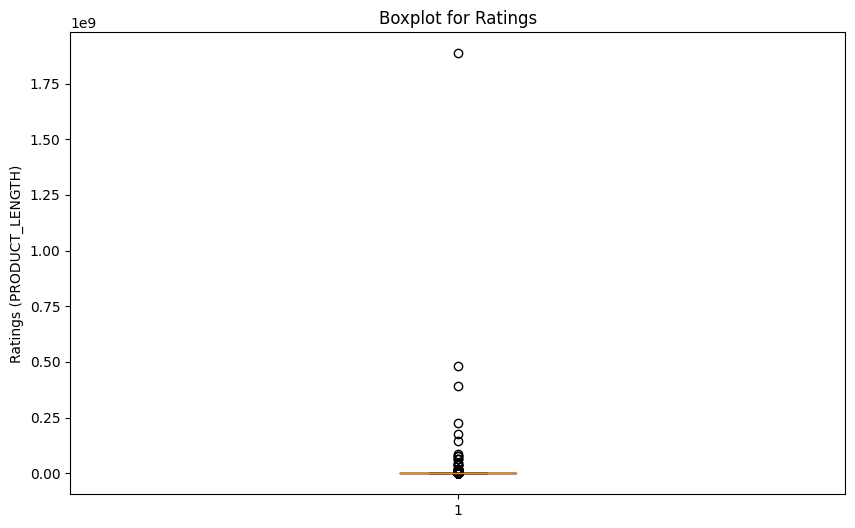

In [54]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming 'long_format_df' is already defined and contains the 'rating' column
# # Sort the 'rating' column in descending order
# sorted_ratings = long_format_df['rating'].sort_values(ascending=False)

# # Create a boxplot for the 'rating' column to visualize outliers
# plt.figure(figsize=(10, 6))
# plt.boxplot(sorted_ratings)
# plt.title('Boxplot for Ratings')
# plt.ylabel('Ratings (PRODUCT_LENGTH)')
# plt.show()


In [70]:
data = Dataset.load_from_df(filtered_df[['user', 'item', 'rating']], reader)

In [73]:
trainset, testset = train_test_split(data, test_size=0.25)

In [74]:
algo = SVD()

# Train the algorithm on the trainset
algo.fit(trainset)

# Predict on the test set
predictions = algo.test(testset)

In [75]:
accuracy.rmse(predictions)

RMSE: 1233.1020


1233.1020267537028

In [81]:
# If you want to make a prediction for a specific product type and title
product_type_id = 2201  # (or any other product type ID)
title = 'AAHIL [for Girls Boys] Printed Back Cover for Compatible OnePlus Nord2 5G'  # (or any other title)
predicted_length = algo.predict(product_type_id, title).est
print(f'Predicted length for product type {product_type_id} and title "{title}": {predicted_length}')


Predicted length for product type 2201 and title "AAHIL [for Girls Boys] Printed Back Cover for Compatible OnePlus Nord2 5G": 1889.763775631496


In [84]:
# If you want to use cross-validation to evaluate the model
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1233.57191233.03471233.27791233.52431233.11591233.30490.2139  
MAE (testset)     1175.16251174.34201174.77331174.92531174.65561174.77170.2737  
Fit time          41.64   46.10   43.13   46.69   40.42   43.59   2.45    
Test time         2.72    3.80    4.42    2.51    2.57    3.20    0.77    


{'test_rmse': array([1233.57189492, 1233.03470482, 1233.2779294 , 1233.52425797,
        1233.11587024]),
 'test_mae': array([1175.16245833, 1174.34199581, 1174.77332765, 1174.92534006,
        1174.6556056 ]),
 'fit_time': (41.63681387901306,
  46.09659934043884,
  43.12662625312805,
  46.69000434875488,
  40.42326879501343),
 'test_time': (2.720531940460205,
  3.804682493209839,
  4.423112869262695,
  2.506955623626709,
  2.568699598312378)}